# Titanic Dataset – Survival Analysis

Survival analysis using **Python**, **Pandas**, **Matplotlib**, and **Seaborn**.

**Objectives**
- Load and explore the Titanic dataset
- Handle missing values
- Convert categorical data to numeric
- Create visualizations
- Export cleaned dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Plot settings
plt.rcParams["figure.figsize"] = (10,5)
sns.set_style("whitegrid")


In [3]:
df = sns.load_dataset('titanic')
df.shape, df.head()

((891, 15),
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
 0         0       3    male  22.0      1      0   7.2500        S  Third   
 1         1       1  female  38.0      1      0  71.2833        C  First   
 2         1       3  female  26.0      0      0   7.9250        S  Third   
 3         1       1  female  35.0      1      0  53.1000        S  First   
 4         0       3    male  35.0      0      0   8.0500        S  Third   
 
      who  adult_male deck  embark_town alive  alone  
 0    man        True  NaN  Southampton    no  False  
 1  woman       False    C    Cherbourg   yes  False  
 2  woman       False  NaN  Southampton   yes   True  
 3  woman       False    C  Southampton   yes  False  
 4    man        True  NaN  Southampton    no   True  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Missing values per column:
 survived         0
pclass           0
sex         

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


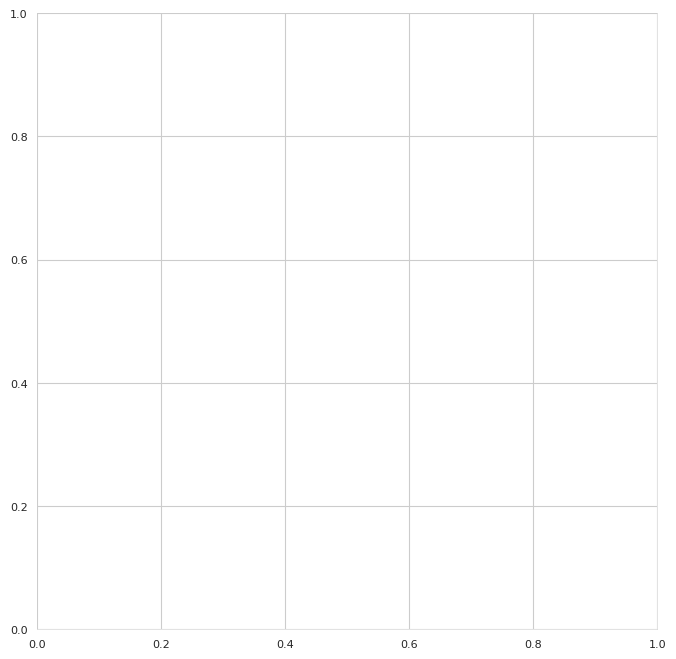

In [5]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
display(df.describe(include='all').T)


## Handling missing values
Strategy:
- Fill `age` with median
- Fill `embarked` with mode
- Drop `deck` (too many missing values)


In [6]:
df_clean = df.copy()

# Fill age
if 'age' in df_clean.columns:
    df_clean['age'].fillna(df_clean['age'].median(), inplace=True)

# Fill embarked
if 'embarked' in df_clean.columns:
    df_clean['embarked'].fillna(df_clean['embarked'].mode()[0], inplace=True)

# Drop deck if present
if 'deck' in df_clean.columns:
    df_clean.drop(columns=['deck'], inplace=True)

# verify
df_clean.isnull().sum()


/tmp/ipython-input-2912389185.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['age'].fillna(df_clean['age'].median(), inplace=True)
/tmp/ipython-input-2912389185.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


## Encoding categorical variables
We'll convert `sex` and `embarked` into numeric codes.


In [7]:
le = LabelEncoder()
if 'sex' in df_clean.columns:
    df_clean['sex_code'] = le.fit_transform(df_clean['sex'].astype(str))
if 'embarked' in df_clean.columns:
    df_clean['embarked_code'] = le.fit_transform(df_clean['embarked'].astype(str))

# show a small sample
df_clean[['sex','sex_code','embarked','embarked_code']].head()


,sex,sex_code,embarked,embarked_code
0,male,1,S,2
1,female,0,C,0
2,female,0,S,2
3,female,0,S,2
4,male,1,S,2


In [8]:
if {'sibsp','parch'}.issubset(df_clean.columns):
    df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1

df_clean[['sibsp','parch','family_size']].head()


,sibsp,parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


## Visualizations
We will produce:
- Survival by gender
- Survival by class
- Survival by family size
- Survival by age group
- Fare distribution by survival


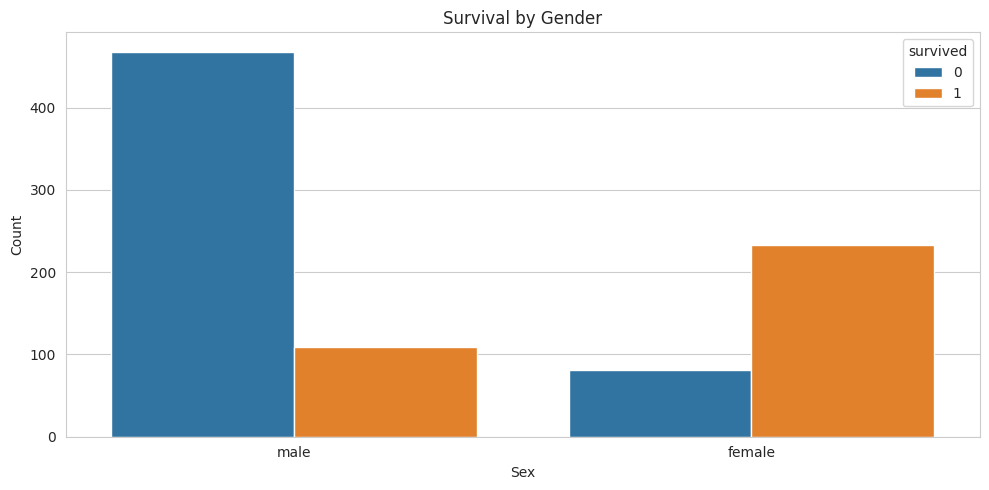

In [10]:
# seaborn dataset 'sex' values are 'male'/'female' so use original column if present
if 'sex' in df_clean.columns and 'survived' in df_clean.columns:
    sns.countplot(x='sex', hue='survived', data=df_clean)
    plt.title('Survival by Gender')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('/content/survival_by_gender.png')
    plt.show()


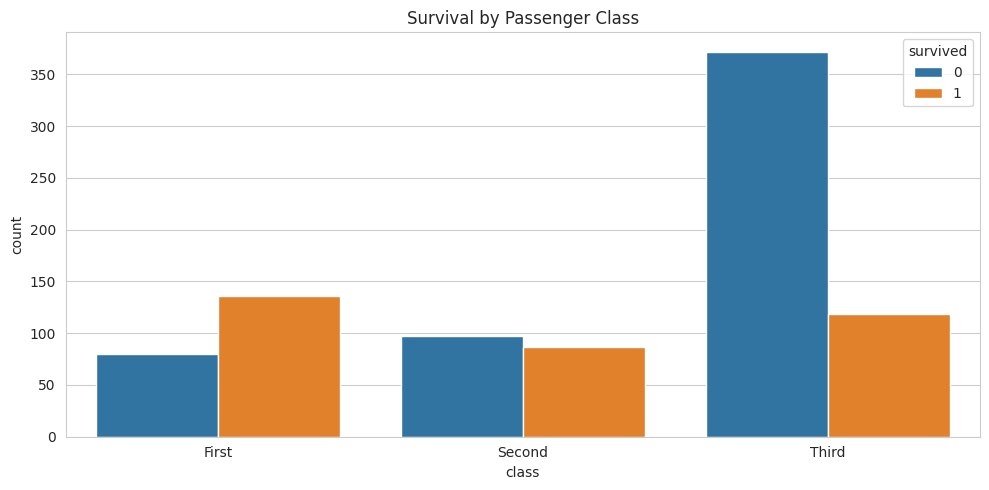

In [11]:
# class column in seaborn dataset is 'class'
if 'class' in df_clean.columns and 'survived' in df_clean.columns:
    sns.countplot(x='class', hue='survived', data=df_clean)
    plt.title('Survival by Passenger Class')
    plt.tight_layout()
    plt.savefig('/content/survival_by_class.png')
    plt.show()


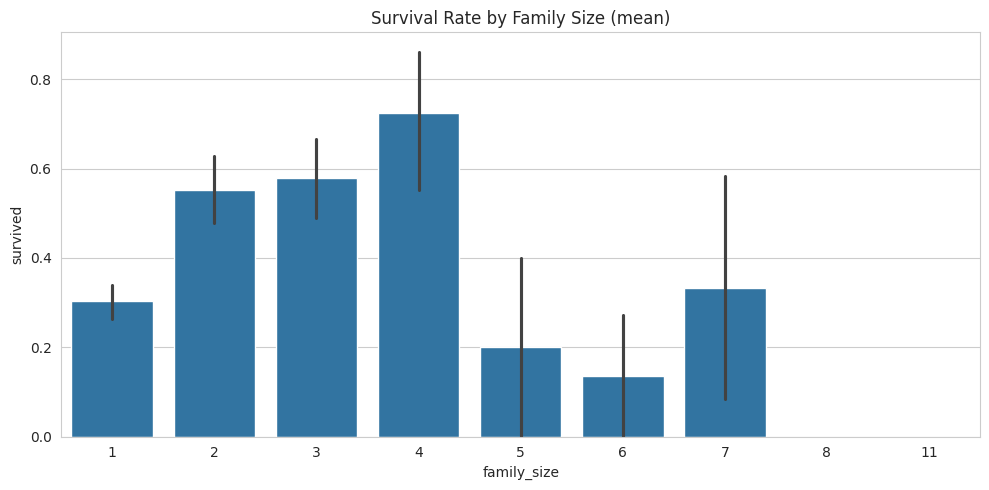

In [12]:
if 'family_size' in df_clean.columns:
    sns.barplot(x='family_size', y='survived', data=df_clean, estimator=np.mean)
    plt.title('Survival Rate by Family Size (mean)')
    plt.tight_layout()
    plt.savefig('/content/survival_by_family_size.png')
    plt.show()


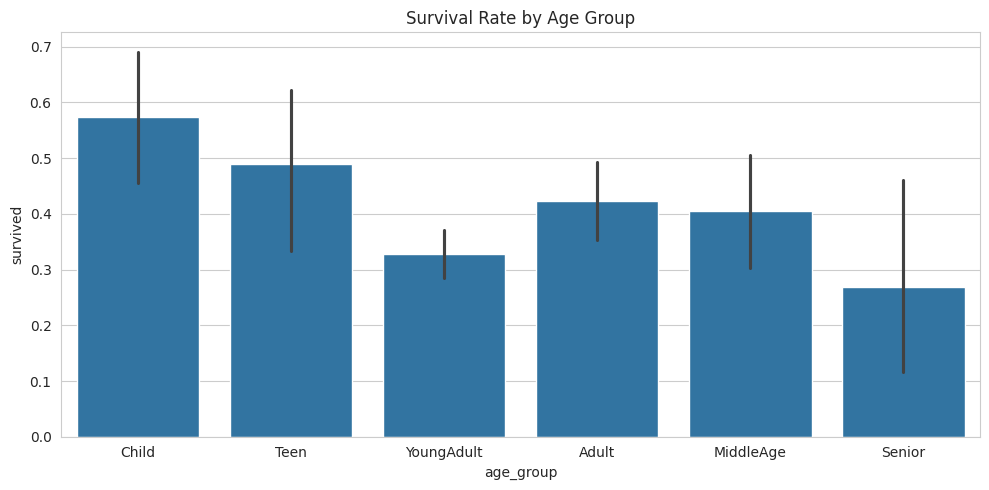

In [13]:
# create age groups
if 'age' in df_clean.columns:
    bins = [0, 12, 18, 30, 45, 60, 120]
    labels = ['Child','Teen','YoungAdult','Adult','MiddleAge','Senior']
    df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)
    sns.barplot(x='age_group', y='survived', data=df_clean, order=labels, estimator=np.mean)
    plt.title('Survival Rate by Age Group')
    plt.tight_layout()
    plt.savefig('/content/survival_by_age_group.png')
    plt.show()


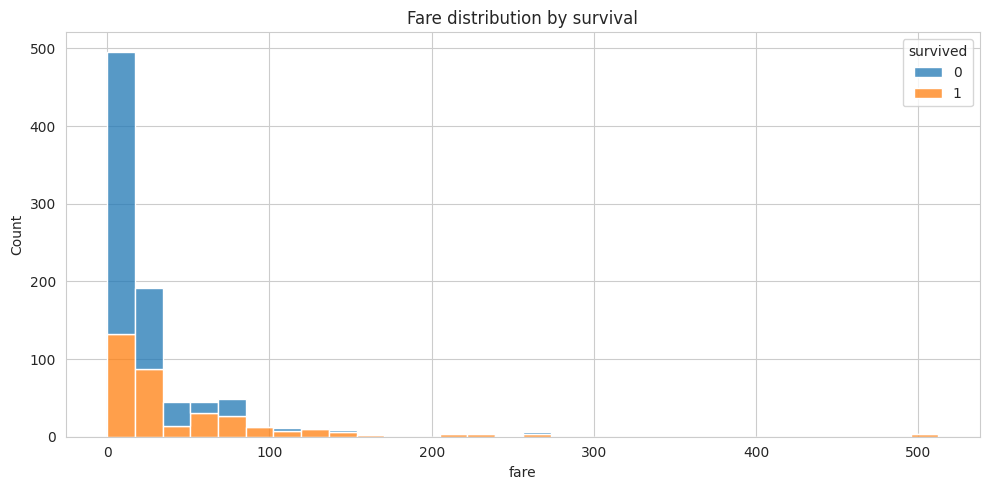

In [14]:
if 'fare' in df_clean.columns and 'survived' in df_clean.columns:
    sns.histplot(data=df_clean, x='fare', hue='survived', multiple='stack', bins=30)
    plt.title('Fare distribution by survival')
    plt.tight_layout()
    plt.savefig('/content/fare_vs_survival.png')
    plt.show()


## Groupby and pivot table
Analyze mean survival by sex and class.


In [15]:
print("Mean survival by sex:")
print(df_clean.groupby('sex')['survived'].mean())

print("\nMean survival by class:")
print(df_clean.groupby('class')['survived'].mean())

if 'class' in df_clean.columns and 'sex' in df_clean.columns:
    pivot = pd.pivot_table(df_clean, values='survived', index='class', columns='sex', aggfunc='mean')
    display(pivot)


Mean survival by sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Mean survival by class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


/tmp/ipython-input-796848008.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('class')['survived'].mean())
/tmp/ipython-input-796848008.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df_clean, values='survived', index='class', columns='sex', aggfunc='mean')


sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


## Export cleaned dataset and download images
We will save the cleaned CSV and allow download.


In [16]:
# cleaned CSV
clean_path = '/content/titanic_cleaned.csv'
df_clean.to_csv(clean_path, index=False)
print("Saved cleaned dataset to:", clean_path)

# List saved images
import os
for f in os.listdir('/content'):
    if f.endswith('.png'):
        print(f)


Saved cleaned dataset to: /content/titanic_cleaned.csv
survival_by_class.png
survival_by_age_group.png
survival_by_gender.png
survival_by_family_size.png
fare_vs_survival.png


In [17]:
from google.colab import files
files.download('/content/titanic_cleaned.csv')
files.download('/content/survival_by_gender.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# Remove target leaks and duplicate info
df_clean = df.drop(columns=["alive", "who", "deck", "embark_town", "class"])

from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

label = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = label.fit_transform(df_encoded[col].astype(str))

X = df_encoded.drop("survived", axis=1)
y = df_encoded["survived"]




In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and fit model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.82

Confusion Matrix:
[[91 14]
 [18 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Conclusion

In this project, we analyzed the Titanic dataset to predict passenger survival using a Random Forest Classifier.  
After proper data cleaning and removing columns that leaked survival information (`alive`, `who`, `deck`, `class`, `embark_town`), the model achieved an **accuracy of 82%** on the test set.

**Strengths:**
- Good balance between precision and recall for both classes.
- Accuracy is realistic for Titanic without advanced tuning.

**Insights:**
- Key survival factors include sex, passenger class (`pclass`), age, and embarkation port.
- Data leakage can create misleadingly high accuracy, so careful feature selection is essential.

**Limitations:**
- Performance can be improved with hyperparameter tuning and feature engineering.
- Dataset size is small, limiting generalization.

**Final Remark:**  
With proper preprocessing and feature selection, machine learning models can make reliable predictions without being misled by data leaks.
